In [20]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

 #### Total Energies in eV

In [21]:
E0=-11861477.311070437 # pristine
E1=-11872355.158936081# addon S
E2=-11850595.236526014 # mono S vacancy
E3=-11839713.678986968 # di S vacancy up&down
E4=-11839713.145423930 # di S vacancy neighboring
E5=-11408771.970668823 # mono W vacancy
E_WS2=-474458.138971034 # primtitive
ES8=-10879.736195389734*8   #8 atoms in unitcell of S8 ring
EW=-452700.23153344775*2 # W BCC 

#### Constants

In [22]:
pi=numpy.pi
convert=29979245800.0*2*pi # cm^-1 to Hz

#### Frequencies 

In [23]:
d0=pd.read_csv('w0', sep='\s+',header=0)
d1=pd.read_csv('addS', sep='\s+',header=0)
d2=pd.read_csv('VS', sep='\s+',header=0)
d3=pd.read_csv('VS2', sep='\s+',header=0)
d4=pd.read_csv('VS22', sep='\s+',header=0)
d5=pd.read_csv('VW', sep='\s+',header=0)
dS=pd.read_csv('w', sep='\s+',header=0)
dW=pd.read_csv('W_BCC', sep='\s+',header=0)

wW=dW['x']*convert 
wS8=dS['x']*convert 
w0=d0['w0']*convert
w1=d1['addS']*convert
w2=d2['VS']*convert
w3=d3['VS2']*convert
w4=d4['VS22']*convert
w5=d5['VW']*convert 

In [24]:

p0=1013250  # atm to g/(cm s^2) 
p=3.3108987*p0# at 1000k k
kk=1.380649e-16 # erg/k (cm^2.g/ks^2)
k=8.617333262145e-05 # ev/k
h=6.62607015e-27  # erg.s 
hb=6.582119569e-16 # eV.s
hbar=1.054571817e-27 # erg.s
sigma=8
m=4.258952992e-22 # 32.06*8 in amu changed to g
IA=1.314051643394595e-37 # g.cm^2
IB=1.314146807283309e-37
IC=2.42660958899724e-37

In [25]:
D=[]
E=[]
mu_0=[]

I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
for T in range(1,1600,20):
        A=np.log((((2*pi*m)**(3/2))*((kk*T)**(5/2)))/(p0*(h**3)))
        B=np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*kk*T)/(h**2))**(3/2))*I)
        temp=numpy.array([(np.log(1-math.exp(-(hbar*i)/(kk*T)))) for i in wS8])
        C=np.sum(temp)
        E.append(k*T*np.log(p/p0))
        mu_0.append(-k*T*(A+B-C)) 
        
#
#print('E',E)
#print('mu_0', mu_0)
temp2=numpy.array([(hb*i)/(2) for i in wS8])
D=np.sum(temp2)
#print('D',D)
mu_S8=np.array(mu_0) + np.array(E) + D + ES8 
#print('mu_S8',mu_S8)

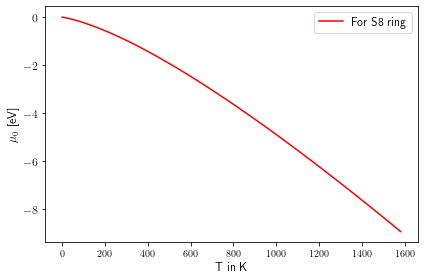

In [26]:
T=range(1,1600,20)
plt.plot(T,mu_0, 'red', label='For S8 ring') 
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_0$ [eV]', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('mu0_T.pdf')

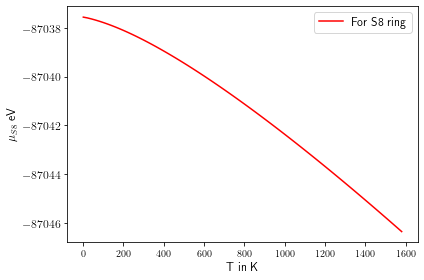

In [27]:
T=arange(1,1600,20)

plt.plot(T,mu_S8, 'red', label='For S8 ring')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{S8}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

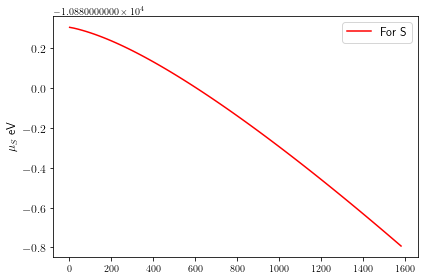

In [28]:
mu_S=mu_S8/8
plt.plot(T,mu_S, 'red', label='For S')
plt.ylabel(r'$\mu_S$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muS_T.png',dpi=400)

In [29]:
def free_energy(omega):
   F=[]
  
   omega = numpy.array(omega)
   for T in arange(1,1600,20):
      
     temp3=numpy.array([(hb*i/2 + k*T*np.log(1-math.exp(-(hb*i)/(k*T)))) for i in omega])
     F.append(numpy.sum(temp3))


   return F

In [30]:
def DeltaF(X,Y):
   deltaF=[]
   F1=free_energy(X)
   F2=free_energy(Y)
   zip_object = zip(F1, F2)
   for i, j in zip_object:    
       deltaF.append(i-j)
   return deltaF 

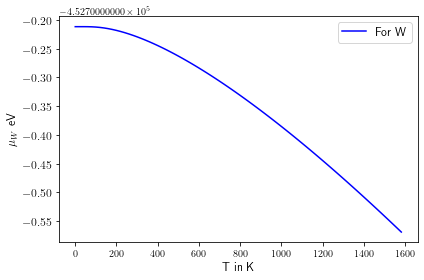

In [31]:
Fphon=free_energy(wW)
Fphon=np.array(Fphon)

V= 0.292849E+02 # volume of unitcell A^3
pp= 4.10056785e-05 # at 2500 k
PV=pp*V*6.3242093e-07 # to eV
#print(mu_W)
mu_W=(1/2)*(EW+PV+ Fphon)
T=arange(1,1600,20)
plt.plot(T,mu_W, 'blue', label='For W')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{W}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muW_T.png',dpi=400)

In [32]:
addS = numpy.array([E1-E0-a + b for a, b in zip(mu_S, DeltaF(w1,w0))])
VS = numpy.array([E2-E0+a + b for a, b in zip(mu_S, DeltaF(w2,w0))])
VS2 =numpy.array([E3-E0+2*a + b for a, b in zip(mu_S, DeltaF(w3,w0))])
VS22 =numpy.array([E4-E0+2*a + b for a, b in zip(mu_S, DeltaF(w4,w0))])
VW =numpy.array([E5-E0+a + b for a, b in zip(mu_W, DeltaF(w5,w0))])


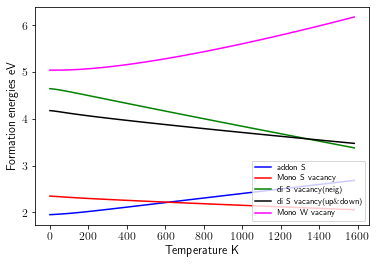

In [33]:
T=arange(1,1600,20)

plt.plot(T, addS, 'b', label='addon S')
plt.plot(T, VS, 'r', label='Mono S vacancy')
plt.plot(T, VS22, 'g', label='di S vacancy(neig)') 
plt.plot(T, VS2, 'k', label=r'di S vacancy(up$\&$down)')
plt.plot(T, VW, 'magenta', label='Mono W vacany') 
plt.xlabel('Temperature K', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(loc='lower right',fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Ef_T_2.png',dpi=400)
plt.show()

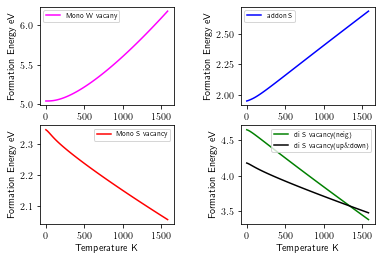

In [34]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)
axs[0, 0].plot(T, VW, 'magenta', label='Mono W vacany')
axs[0, 0].legend(fontsize=7)
axs[0, 1].plot(T, addS, 'b', label='addon S')
axs[0, 1].legend(fontsize=7)
axs[1, 0].plot(T, VS, 'r', label='Mono S vacancy')
axs[1, 0].legend(fontsize=7)
axs[1, 1].plot(T, VS22, 'g', label='di S vacancy(neig)')
axs[1, 1].plot(T, VS2, 'k', label=r'di S vacancy(up$\&$down)')
axs[1, 1].legend(fontsize=7)

for ax in axs.flat:
    ax.set(xlabel='Temperature K', ylabel='Formation Energy eV')

plt.savefig('Ef_2_T_2.png',dpi=400)   

In [35]:
def conc(r,g):
   rho=[]
   T=arange(1,1600,20)
   t=k*T
   for i,j in zip(r,t):
       #print('Gf is:',i, ' KT is: ', j, 'ratio is: ', i/j)
       #temp=(g/(146.78431348071518e-20))*math.exp(-i/j)
       temp=(g)*math.exp(-i/j)
       rho.append(temp)
      
   return rho  

<ipython-input-36-f2231db820df>:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(1/T,np.log(rho1) , 'b', label='addon S')
<ipython-input-36-f2231db820df>:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(1/T, np.log(rho2), 'r', label='Mono S vacancy')
<ipython-input-36-f2231db820df>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(1/T, np.log(rho3), 'g', label='di S vacancy(neig)')
<ipython-input-36-f2231db820df>:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(1/T, np.log(rho4), 'k', label=r'di S vacancy(up$\&$down)')
<ipython-input-36-f2231db820df>:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(1/T, np.log(rho5), 'magenta', label='Mono W vacany')


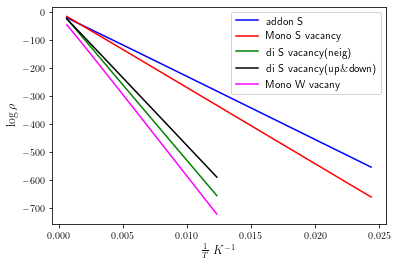

In [36]:
rho1=conc(addS,1)
rho2=conc(VS,1)
rho3=conc(VS22,6)
rho4=conc(VS2,6)
rho5=conc(VW,1)

T=arange(1,1600,20)

plt.plot(1/T,np.log(rho1) , 'b', label='addon S')
plt.plot(1/T, np.log(rho2), 'r', label='Mono S vacancy') 
plt.plot(1/T, np.log(rho3), 'g', label='di S vacancy(neig)') 
plt.plot(1/T, np.log(rho4), 'k', label=r'di S vacancy(up$\&$down)') 
plt.plot(1/T, np.log(rho5), 'magenta', label='Mono W vacany') 
plt.xlabel(r'$\frac{1}{T}$ $ K^{-1}$', fontsize=12)
plt.ylabel(r'$\log\rho $', fontsize=12)
plt.legend(fontsize=11)
#plt.xlim(1/800,1/1600)
plt.savefig('logarithm_rho.pdf')  
plt.show()

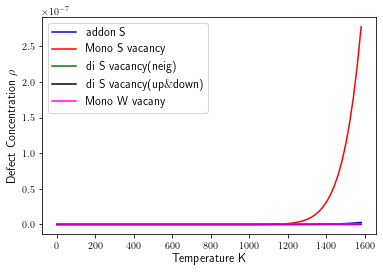

In [37]:
T=arange(1,1600,20)
plt.plot(T,rho1 , 'b', label='addon S')
plt.plot(T, rho2, 'r', label='Mono S vacancy') 
plt.plot(T, rho3, 'g', label='di S vacancy(neig)') 
plt.plot(T, rho4, 'k', label=r'di S vacancy(up$\&$down)') 
plt.plot(T, rho5, 'magenta', label='Mono W vacany') 

plt.xlabel('Temperature K', fontsize=12)
plt.ylabel(r'Defect Concentration $\rho$', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('rho_T.png',dpi=400)
plt.show()

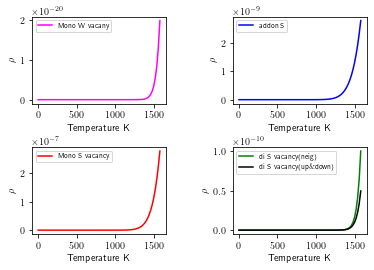

In [38]:
fig, axs = plt.subplots(2, 2)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
axs[0, 0].plot(T, rho5, 'magenta', label='Mono W vacany')
axs[0, 0].legend(fontsize=7)

axs[0, 1].plot(T, rho1, 'b', label='addon S')
axs[0, 1].legend(fontsize=7)

axs[1, 0].plot(T, rho2, 'r', label='Mono S vacancy')
axs[1, 0].legend(fontsize=7)

axs[1, 1].plot(T, rho3, 'g', label='di S vacancy(neig)')
axs[1, 1].plot(T, rho4, 'k', label=r'di S vacancy(up$\&$down)')

axs[1, 1].legend(fontsize=7)

for ax in axs.flat:
    ax.set(xlabel='Temperature K', ylabel=r'$\rho$')

plt.savefig('rho_2_T_2.png',dpi=400) 